In [1]:
import eos
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(114)

In [2]:
#eos.Observables(prefix='L')

In [3]:
#eos.Observables(prefix='L', name='a')

In [4]:
analysis_args = {
    'global_options': { 'form-factors': 'BRvD2021', 'model': 'SM', 'psi' : 'J/psi' },
    'priors': [
        { 'parameter': 'Lambda_b->Lambdaccbar::Re{alpha_0^V_long}@BRvD2021', 'min': 0.0, 'max':  1.0 , 'type': 'uniform'},
        #{ 'parameter': 'Lambda_b->Lambdaccbar::Im{alpha_0^V_long}@BRvD2021', 'min': -1.0, 'max':  1.0 , 'type': 'uniform'},
        { 'parameter': 'Lambda_b->Lambdaccbar::Re{alpha_0^V_perp}@BRvD2021', 'min': -1.0, 'max':  1.0 , 'type': 'uniform'},
        { 'parameter': 'Lambda_b->Lambdaccbar::Im{alpha_0^V_perp}@BRvD2021', 'min': -1.0, 'max':  1.0 , 'type': 'uniform'},
        { 'parameter': 'Lambda_b->Lambdaccbar::Re{alpha_0^A_long}@BRvD2021', 'min': -1.0, 'max':  1.0 , 'type': 'uniform'},
        { 'parameter': 'Lambda_b->Lambdaccbar::Im{alpha_0^A_long}@BRvD2021', 'min': -1.0, 'max':  1.0 , 'type': 'uniform'},
        { 'parameter': 'Lambda_b->Lambdaccbar::Re{alpha_0^A_perp}@BRvD2021', 'min': -1.0, 'max':  1.0 , 'type': 'uniform'},
        { 'parameter': 'Lambda_b->Lambdaccbar::Im{alpha_0^A_perp}@BRvD2021', 'min': -1.0, 'max':  1.0 , 'type': 'uniform'}
        
    ],
    'likelihood': [
        'Lambda_b->LambdaJpsi::K1ss@LHCb-2020',  
        'Lambda_b->LambdaJpsi::K1cc@LHCb-2020',
        'Lambda_b->LambdaJpsi::K2ss@LHCb-2020',
        'Lambda_b->LambdaJpsi::K2cc@LHCb-2020',
        'Lambda_b->LambdaJpsi::K3sc@LHCb-2020',  
        'Lambda_b->LambdaJpsi::K4sc@LHCb-2020',
        'Lambda_b->LambdaJpsi::branching_ratio@HFLAV-2016',
    
    ]
}
analysis = eos.Analysis(**analysis_args)


analysis.parameters['Lambda_b->Lambdaccbar::Re{alpha_0^V_long}@BRvD2021'].set(random.uniform(0,0.002))
#analysis.parameters['Lambda_b->Lambdaccbar::Im{alpha_0^V_long}@BRvD2021'].set(random.uniform(-1.2e-3,1.2e-3))

analysis.parameters['Lambda_b->Lambdaccbar::Re{alpha_0^V_perp}@BRvD2021'].set(random.uniform(0,1.0e-3))
analysis.parameters['Lambda_b->Lambdaccbar::Im{alpha_0^V_perp}@BRvD2021'].set(random.uniform(-1.2e-3,1.2e-3))

analysis.parameters['Lambda_b->Lambdaccbar::Re{alpha_0^A_long}@BRvD2021'].set(random.uniform(-1.2e-3,1.2e-3))
analysis.parameters['Lambda_b->Lambdaccbar::Im{alpha_0^A_long}@BRvD2021'].set(random.uniform(-1.2e-3,1.2e-3))

analysis.parameters['Lambda_b->Lambdaccbar::Re{alpha_0^A_perp}@BRvD2021'].set(random.uniform(-1.2e-3,1.2e-3))
analysis.parameters['Lambda_b->Lambdaccbar::Im{alpha_0^A_perp}@BRvD2021'].set(random.uniform(-1.2e-3,1.2e-3))

In [5]:
analysis.parameters["mass::J/psi"].set(3.0969)
analysis.parameters["mass::psi(2S)"].set(3.6860)
analysis.parameters["mass::Lambda"].set(1.115683)
analysis.parameters["mass::Lambda_b"].set(5.61960)
analysis.parameters["mass::D^0"].set(1.86483)
analysis.parameters["b->sccbar::t_0"].set(9.0)
analysis.parameters["b->sccbar::t_s"].set(-17.4724)
analysis.parameters["b->sccbar::chiOPE@GvDV2020"].set(1.81e-4)
analysis.parameters["Lambda::alpha"].set(0.750)

In [6]:
#help(analysis.sample)
for i in range(1):
    rng= np.random.mtrand.RandomState(12345+i)
    samples, weights = analysis.sample(N=5000,stride=1,pre_N=500,preruns=5,rng = rng) 
#norm_weights = np.exp(weights) 
norm_weights = weights/sum(weights)
#plt.hist(samples[:,0],weights=norm_weights)
#np.median(samples[:,0])

100%|██████████| 100/100 [00:01<00:00, 76.97it/s]


In [7]:
bfp = analysis.optimize()
display(bfp)
display(analysis.goodness_of_fit())

parameter,value
Lambda_b->Lambdaccbar::Re{alpha_0^V_long}@BRvD2021,0.0030
Lambda_b->Lambdaccbar::Re{alpha_0^V_perp}@BRvD2021,0.0002
Lambda_b->Lambdaccbar::Im{alpha_0^V_perp}@BRvD2021,0.0026
Lambda_b->Lambdaccbar::Re{alpha_0^A_long}@BRvD2021,0.0035
Lambda_b->Lambdaccbar::Im{alpha_0^A_long}@BRvD2021,0.0007
Lambda_b->Lambdaccbar::Re{alpha_0^A_perp}@BRvD2021,0.0003
Lambda_b->Lambdaccbar::Im{alpha_0^A_perp}@BRvD2021,0.0019


In [8]:
eos.Observable.make("Lambda_b->Lambdacharmonium::K1ss", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::K1ss,(eos.Observable)
current value,0.377


In [9]:
eos.Observable.make("Lambda_b->Lambdacharmonium::K1cc", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::K1cc,(eos.Observable)
current value,0.246


In [10]:
eos.Observable.make("Lambda_b->Lambdacharmonium::K2cc", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::K2cc,(eos.Observable)
current value,-0.177


In [11]:
eos.Observable.make("Lambda_b->Lambdacharmonium::K2ss", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::K2ss,(eos.Observable)
current value,-0.273


In [12]:
eos.Observable.make("Lambda_b->Lambdacharmonium::K3sc", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::K3sc,(eos.Observable)
current value,-0.021


In [13]:
eos.Observable.make("Lambda_b->Lambdacharmonium::K4sc", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::K4sc,(eos.Observable)
current value,0.026


In [14]:
eos.Observable.make("Lambda_b->Lambdacharmonium::alpha_b", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::alpha_b,(eos.Observable)
current value,-0.01996


In [15]:
eos.Observable.make("Lambda_b->Lambdacharmonium::branching_ratio", analysis.parameters, eos.Kinematics(), eos.Options())

Lambda_b->Lambdacharmonium::branching_ratio,(eos.Observable)
current value,0.0003699


In [16]:
eos.Observable.make("Lambda_b->Lambda::re_H_V_long(q2)", analysis.parameters, eos.Kinematics(q2=2), eos.Options())

Lambda_b->Lambda::re_H_V_long(q2),(eos.Observable)
current value,2.546e-07


In [17]:
eos.Observable.make("Lambda_b->Lambda::re_H_V_perp(q2)", analysis.parameters, eos.Kinematics(q2=2), eos.Options())

Lambda_b->Lambda::re_H_V_perp(q2),(eos.Observable)
current value,6.938e-08


In [18]:
eos.Observable.make("Lambda_b->Lambda::re_H_A_long(q2)", analysis.parameters, eos.Kinematics(q2=2), eos.Options())

Lambda_b->Lambda::re_H_A_long(q2),(eos.Observable)
current value,2.868e-07


In [19]:
eos.Observable.make("Lambda_b->Lambda::im_H_A_long(q2)", analysis.parameters, eos.Kinematics(q2=2), eos.Options())

Lambda_b->Lambda::im_H_A_long(q2),(eos.Observable)
current value,5.527e-08


In [20]:
eos.Observable.make("Lambda_b->Lambda::re_H_A_perp(q2)", analysis.parameters, eos.Kinematics(q2=2), eos.Options())

Lambda_b->Lambda::re_H_A_perp(q2),(eos.Observable)
current value,7.437e-08


In [21]:
eos.Observable.make("Lambda_b->Lambda::im_H_A_perp(q2)", analysis.parameters, eos.Kinematics(q2=2), eos.Options())


Lambda_b->Lambda::im_H_A_perp(q2),(eos.Observable)
current value,5.064e-07


In [22]:
q2values  = np.unique(np.concatenate((np.linspace(-10, 0, 20), np.linspace(0, 10, 20))))
re_H_V_perp_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::re_H_V_perp(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]
ff_V_perp       = [eos.Observable.make("Lambda_b->Lambda::f_perp^V(q2)", analysis.parameters, eos.Kinematics(q2=q2), 
                    eos.Options(**{'form-factors': 'DM2016'}))
               for q2 in q2values]
##=======================================================##
re_H_V_long_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::re_H_V_long(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]

re_H_A_perp_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::re_H_A_perp(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]
re_H_A_long_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::re_H_A_long(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]

_, log_weights, re_H_V_perp_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=re_H_V_perp_obs)
#_, log_weights, ff_V_perp_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=ff_V_perp)
##=======================================================##

_, log_weights, re_H_V_long_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=re_H_V_long_obs)

_, log_weights, re_H_A_perp_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=re_H_A_perp_obs)
_, log_weights, re_H_A_long_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=re_H_A_long_obs)



100%|██████████| 100/100 [00:13<00:00,  7.67it/s]


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


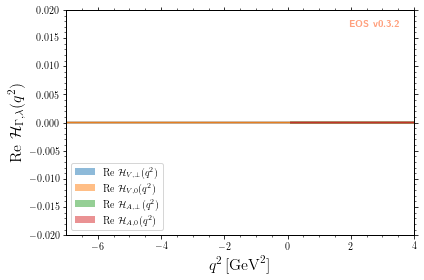

In [23]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-7,4] },
        'y': { 'label': r'Re $\mathcal{H}_{\Gamma,\lambda}(q^2)$', 'range':[-0.02,0.02]   },
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
          'label': r'Re $\mathcal{H}_{V,\perp}(q^2)$', 'type': 'uncertainty', 'range': [-7, 11.60],
          'data': { 'samples': re_H_V_perp_samples, 'xvalues': q2values }
        },
        {
          'label': r'Re $\mathcal{H}_{V, 0}(q^2)$', 'type': 'uncertainty', 'range': [-7, 11.60],
          'data': { 'samples': re_H_V_long_samples, 'xvalues': q2values }
        },
        {
          'label': r'Re $\mathcal{H}_{A,\perp}(q^2)$', 'type': 'uncertainty', 'range': [0.001, 11.60],
          'data': { 'samples': re_H_A_perp_samples, 'xvalues': q2values }
        },
        {
          'label': r'Re $\mathcal{H}_{A, 0}(q^2)$', 'type': 'uncertainty', 'range': [0.001, 11.60],
          'data': { 'samples': re_H_A_long_samples, 'xvalues': q2values }
        },
    ]
}
eos.plot.Plotter(plot_args,"Re_NonLocal.jpg").plot()

In [24]:
q2values  = np.unique(np.concatenate((np.linspace(-10, 0, 20), np.linspace(0, 10, 20))))
im_H_V_perp_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::im_H_V_perp(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]
im_H_V_long_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::im_H_V_long(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]

im_H_A_perp_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::im_H_A_perp(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]
im_H_A_long_obs       = [eos.Observable.make(
                   "Lambda_b->Lambda::im_H_A_long(q2)", analysis.parameters, eos.Kinematics(q2=q2),
                   eos.Options())
               for q2 in q2values]

_, log_weights, im_H_V_perp_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=im_H_V_perp_obs)
_, log_weights, im_H_V_long_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50, observables=im_H_V_long_obs)

_, log_weights, im_H_A_perp_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=im_H_A_perp_obs)
_, log_weights, im_H_A_long_samples  = analysis.sample(N=5000, pre_N=1000, stride=10,preruns=50,observables=im_H_A_long_obs)



100%|██████████| 100/100 [00:13<00:00,  7.69it/s]


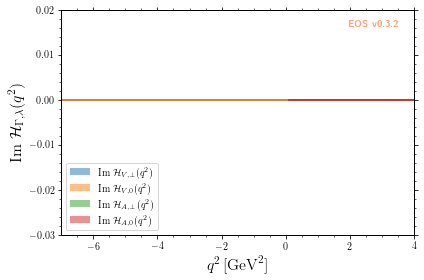

In [25]:
plot_args = {
    'plot': {
        'x': { 'label': r'$q^2$', 'unit': r'$\textnormal{GeV}^2$', 'range': [-7,4] },
        'y': { 'label': r'Im $\mathcal{H}_{\Gamma,\lambda}(q^2)$', 'range':[-0.03,0.02]   },
        'legend': { 'location': 'lower left' }
    },
    'contents': [
        {
          'label': r'Im $\mathcal{H}_{V,\perp}(q^2)$', 'type': 'uncertainty', 'range': [-7, 11.60],
          'data': { 'samples': im_H_V_perp_samples, 'xvalues': q2values }
        },
        {
          'label': r'Im $\mathcal{H}_{V, 0}(q^2)$', 'type': 'uncertainty', 'range': [-7, 11.60],
          'data': { 'samples': im_H_V_long_samples, 'xvalues': q2values }
        },
        {
          'label': r'Im $\mathcal{H}_{A,\perp}(q^2)$', 'type': 'uncertainty', 'range': [0.001, 11.60],
          'data': { 'samples': im_H_A_perp_samples, 'xvalues': q2values }
        },
        {
          'label': r'Im $\mathcal{H}_{A, 0}(q^2)$', 'type': 'uncertainty', 'range': [0.001, 11.60],
          'data': { 'samples': im_H_A_long_samples, 'xvalues': q2values }
        },
    ]
}
eos.plot.Plotter(plot_args,"Im_NonLocal.jpg").plot()

In [26]:
ff_list = ["f_long^T(q2)","f_perp^T(q2)","f_long^T5(q2)","f_perp^T5(q2)"]
m_psi = 3.0969
m_Lam = 1.115683
m_LamB = 5.61960

for q2_val in np.arange(-7,0,1):
    kin = eos.Kinematics(q2= float(q2_val))
    for ff in ff_list:        
        obs=eos.Observable.make("Lambda_b->Lambda::"+ff, analysis.parameters, kin, eos.Options(**{'form-factors': 'DM2016'}))
        obs = obs.evaluate()
        
        if ff == "f_long^T(q2)":
            obs = q2_val/((m_LamB+m_Lam)*m_LamB) * obs
            msg = "FF: {}, q2: {}, val: {}".format(ff, q2_val, obs)
            print(msg)
        elif ff == "f_perp^T(q2)":
            obs = (m_LamB+m_Lam)/m_LamB * obs
            msg = "FF: {}, q2: {}, val: {}".format(ff, q2_val, obs)
            print(msg)
        elif ff == "f_long^T5(q2)":
            obs = q2_val/((m_LamB-m_Lam)*m_LamB) * obs
            msg = "FF: {}, q2: {}, val: {}".format(ff, q2_val, obs)
            print(msg)
        elif ff == "f_perp^T5(q2)":
            obs = (m_LamB-m_Lam)/m_LamB * obs
            msg = "FF: {}, q2: {}, val: {}".format(ff, q2_val, obs)
            print(msg)
    print("=========================================================")

FF: f_long^T(q2), q2: -7, val: -0.027752996147376637
FF: f_perp^T(q2), q2: -7, val: 0.11951369606619909
FF: f_long^T5(q2), q2: -7, val: -0.02928379560358907
FF: f_perp^T5(q2), q2: -7, val: 0.07922404242827455
FF: f_long^T(q2), q2: -6, val: -0.025324448366650376
FF: f_perp^T(q2), q2: -6, val: 0.12846023039959933
FF: f_long^T5(q2), q2: -6, val: -0.026641037702643214
FF: f_perp^T5(q2), q2: -6, val: 0.08441068698647698
FF: f_long^T(q2), q2: -5, val: -0.022480080425689324
FF: f_perp^T(q2), q2: -5, val: 0.13809554948690353
FF: f_long^T5(q2), q2: -5, val: -0.023574677348026513
FF: f_perp^T5(q2), q2: -5, val: 0.08996475441639411
FF: f_long^T(q2), q2: -4, val: -0.019170038950954173
FF: f_perp^T(q2), q2: -4, val: 0.148490917359436
FF: f_long^T5(q2), q2: -4, val: -0.020037564247979017
FF: f_perp^T5(q2), q2: -4, val: 0.09592121942808925
FF: f_long^T(q2), q2: -3, val: -0.015337374254679084
FF: f_perp^T(q2), q2: -3, val: 0.15972718225627214
FF: f_long^T5(q2), q2: -3, val: -0.015976360073032096
FF: f

In [27]:
kin=eos.Kinematics(q2=-1)
eos.Observable.make("Lambda_b->Lambda::f_long^A(q2)", analysis.parameters, kin, eos.Options(**{'form-factors': 'DM2016'}))


Lambda_b->Lambda::f_long^A(q2),(eos.Observable)
current value,0.1012
